# Variant Analysis Workflow

Experiment:
0. Environment setting
1. Sequence Reads
2. Trim reads  (sickle)
3. Mapping (bwa)
4. SAM to BAM (samtool)
5. Sorted BAM (samtool)
6. mappingstats (samtool)
7. mpileup (bcftools)
8. variant call (bcftools)
9. variant stat (bcftools)

Tools: sickle, bwa, bcftools, samtool, bioconda

Data small dataset

## 00. Environment setting

In [1]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",START" >> log.txt

In [2]:
# Bioconda

! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
! chmod +x miniconda.sh
! bash ./miniconda.sh -b -f -p /usr/local
! rm miniconda.sh
! conda config --add channels conda-forge
! conda config --add channels bioconda
! conda install -y mamba
! mamba update -qy --all
! mamba clean -qafy
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-02-01 02:14:10--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>]  84.90M  93.1MB/s    in 0.9s    

2023-02-01 02:14:12 (93.1 MB/s) - ‘miniconda.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
S

In [3]:
%%bash

conda config --show channels

channels:
  - bioconda
  - conda-forge
  - defaults


In [4]:
# Install packages

!conda install -q -y --prefix /usr/local  bwa bcftools samtool

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - samtool

Current channels:

  - https://conda.anaconda.org/bioconda/linux-64
  - https://conda.anaconda.org/bioconda/noarch
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [5]:
!mamba install -y -c bioconda sickle-trim


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.27.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['sickle-trim']

warning  libmamba Could not parse mod/etag header
warning  libmamba Could not pars

## Environment check

In [6]:
%%bash
conda --version
python --version

conda 23.1.0
Python 3.7.12


In [7]:
!bwa


Program: bwa (alignment via Burrows-Wheeler transformation)
Version: 0.7.17-r1188
Contact: Heng Li <lh3@sanger.ac.uk>

Usage:   bwa <command> [options]

Command: index         index sequences in the FASTA format
         mem           BWA-MEM algorithm
         fastmap       identify super-maximal exact matches
         pemerge       merge overlapping paired ends (EXPERIMENTAL)
         aln           gapped/ungapped alignment
         samse         generate alignment (single ended)
         sampe         generate alignment (paired ended)
         bwasw         BWA-SW for long queries

         shm           manage indices in shared memory
         fa2pac        convert FASTA to PAC format
         pac2bwt       generate BWT from PAC
         pac2bwtgen    alternative algorithm for generating BWT
         bwtupdate     update .bwt to the new format
         bwt2sa        generate SA from BWT and Occ

Note: To use BWA, you need to first index the genome with `bwa index'.
      There are

In [8]:
!bcftools


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
License: GNU GPLv3+, due to use of the GNU Scientific Library
Version: 1.16 (using htslib 1.16)

Usage:   bcftools [--version|--version-only] [--help] <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    head         view VCF/BCF file headers
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    sort         sort VCF/BCF file
    view         VCF/BCF conversion, view, subset and filter V

In [9]:
!samtools


Program: samtools (Tools for alignments in the SAM format)
Version: 1.16.1 (using htslib 1.16)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates
     ampliconclip   clip oligos from the end of reads

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     consensus      produce a consensus Pileup/FASTA/FASTQ
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits

In [10]:
!sickle


Usage: sickle <command> [options]

Command:
pe	paired-end sequence trimming
se	single-end sequence trimming

--help, display this help and exit
--version, output version information and exit



In [12]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",00. Environment setting" >> log.txt

## 01. Sequence Reads

In [13]:
!wget http://ftp.sra.ebi.ac.uk/vol1/run/ERR333/ERR3335404/P7741_R1.fastq.gz

--2023-02-01 02:20:12--  http://ftp.sra.ebi.ac.uk/vol1/run/ERR333/ERR3335404/P7741_R1.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48483635 (46M) [application/x-gzip]
Saving to: ‘P7741_R1.fastq.gz.1’

P7741_R1.fastq.gz.1 100%[===================>]  46.24M   635KB/s    in 75s     

2023-02-01 02:21:38 (632 KB/s) - ‘P7741_R1.fastq.gz.1’ saved [48483635/48483635]



In [14]:
!wget http://ftp.sra.ebi.ac.uk/vol1/run/ERR333/ERR3335404/P7741_R2.fastq.gz

--2023-02-01 02:21:38--  http://ftp.sra.ebi.ac.uk/vol1/run/ERR333/ERR3335404/P7741_R2.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54395207 (52M) [application/x-gzip]
Saving to: ‘P7741_R2.fastq.gz.1’

P7741_R2.fastq.gz.1 100%[===================>]  51.88M   629KB/s    in 85s     

2023-02-01 02:23:03 (629 KB/s) - ‘P7741_R2.fastq.gz.1’ saved [54395207/54395207]



In [15]:
!wget https://github.com/jingwora/bwa/raw/master/dataset2/ncbi/Agy99.fasta

--2023-02-01 02:23:04--  https://github.com/jingwora/bwa/raw/master/dataset2/ncbi/Agy99.fasta
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jingwora/bwa/master/dataset2/ncbi/Agy99.fasta [following]
--2023-02-01 02:23:04--  https://raw.githubusercontent.com/jingwora/bwa/master/dataset2/ncbi/Agy99.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5712117 (5.4M) [text/plain]
Saving to: ‘Agy99.fasta’

Agy99.fasta         100%[===================>]   5.45M  --.-KB/s    in 0.1s    

2023-02-01 02:23:04 (39.3 MB/s) - ‘Agy99.fasta’ saved [5712117/5712117]



In [16]:
!ls -l

total 842668
-rw-r--r-- 1 root root   5712117 Feb  1 02:23 Agy99.fasta
-rw-r--r-- 1 root root       271 Feb  1 02:20 log.txt
-rw-r--r-- 1 root root       421 Jan 31 22:00 mappingstats.txt
-rw-r--r-- 1 root root  95348765 Jan 31 21:31 output.bam
-rw-r--r-- 1 root root 309606147 Jan 31 21:24 output.sam
-rw-r--r-- 1 root root  70805124 Jan 31 21:48 output.sorted.bam
-rw-r--r-- 1 root root  48483635 May 21  2019 P7741_R1.fastq.gz
-rw-r--r-- 1 root root  48483635 May 21  2019 P7741_R1.fastq.gz.1
-rw-r--r-- 1 root root  54395207 May 21  2019 P7741_R2.fastq.gz
-rw-r--r-- 1 root root  54395207 May 21  2019 P7741_R2.fastq.gz.1
-rw-r--r-- 1 root root    252101 Jan 31 22:30 pos.txt
-rw-r--r-- 1 root root  91506412 Jan 31 22:11 raw.bcf
drwxr-xr-x 2 root root      4096 Jan 31 22:08 ref
drwxr-xr-x 1 root root      4096 Jan 30 14:38 sample_data
-rw-r--r-- 1 root root  38254934 Jan 31 20:51 trimmed_R1.fastq.gz
-rw-r--r-- 1 root root  41154447 Jan 31 20:51 trimmed_R2.fastq.gz
-rw-r--r-- 1 root root    

In [17]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",01. Sequence Reads" >> log.txt

## 02. Trim reads  (sickle)


In [18]:
!sickle pe --h


If you have separate files for forward and reverse reads:
Usage: sickle pe [options] -f <paired-end forward fastq file> -r <paired-end reverse fastq file> -t <quality type> -o <trimmed PE forward file> -p <trimmed PE reverse file> -s <trimmed singles file>

If you have one file with interleaved forward and reverse reads:
Usage: sickle pe [options] -c <interleaved input file> -t <quality type> -m <interleaved trimmed paired-end output> -s <trimmed singles file>

If you have one file with interleaved reads as input and you want ONLY one interleaved file as output:
Usage: sickle pe [options] -c <interleaved input file> -t <quality type> -M <interleaved trimmed output>

Options:
Paired-end separated reads
--------------------------
-f, --pe-file1, Input paired-end forward fastq file (Input files must have same number of records)
-r, --pe-file2, Input paired-end reverse fastq file
-o, --output-pe1, Output trimmed forward fastq file
-p, --output-pe2, Output trimmed reverse fastq file. Must 

In [19]:
# -f, --pe-file1
# -r, --pe-file2
# -t, --qual-typ, sanger (which is CASAVA >= 1.8)
# -q, --qual-threshold  for trimming below 20
# -l, --length-threshold
# -g, --gzip-output
# -o, --output-pe1
# -p, --output-pe2
# -s, --output-single

!sickle pe \
-f P7741_R1.fastq.gz -r P7741_R2.fastq.gz \
-t sanger -q 20 -l 20 \
-g -o trimmed_R1.fastq.gz -p trimmed_R2.fastq.gz -s trimmed_S.fastq.gz


FastQ paired records kept: 538788 (269394 pairs)
FastQ single records kept: 3188 (from PE1: 2524, from PE2: 664)
FastQ paired records discarded: 978 (489 pairs)
FastQ single records discarded: 3188 (from PE1: 664, from PE2: 2524)



In [20]:
!ls

Agy99.fasta	  output.sorted.bam    pos.txt		    trimmed_R2.fastq.gz
log.txt		  P7741_R1.fastq.gz    raw.bcf		    trimmed_S.fastq.gz
mappingstats.txt  P7741_R1.fastq.gz.1  ref		    variants.raw.vcf
output.bam	  P7741_R2.fastq.gz    sample_data
output.sam	  P7741_R2.fastq.gz.1  trimmed_R1.fastq.gz


In [21]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",02. Trim reads (sickle)" >> log.txt

## 03. Mapping (bwa)

In [22]:
!bwa


Program: bwa (alignment via Burrows-Wheeler transformation)
Version: 0.7.17-r1188
Contact: Heng Li <lh3@sanger.ac.uk>

Usage:   bwa <command> [options]

Command: index         index sequences in the FASTA format
         mem           BWA-MEM algorithm
         fastmap       identify super-maximal exact matches
         pemerge       merge overlapping paired ends (EXPERIMENTAL)
         aln           gapped/ungapped alignment
         samse         generate alignment (single ended)
         sampe         generate alignment (paired ended)
         bwasw         BWA-SW for long queries

         shm           manage indices in shared memory
         fa2pac        convert FASTA to PAC format
         pac2bwt       generate BWT from PAC
         pac2bwtgen    alternative algorithm for generating BWT
         bwtupdate     update .bwt to the new format
         bwt2sa        generate SA from BWT and Occ

Note: To use BWA, you need to first index the genome with `bwa index'.
      There are

In [23]:
!mkdir ref
!mv Agy99.fasta ref/

mkdir: cannot create directory ‘ref’: File exists


In [24]:
!bwa index


Usage:   bwa index [options] <in.fasta>

Options: -a STR    BWT construction algorithm: bwtsw, is or rb2 [auto]
         -p STR    prefix of the index [same as fasta name]
         -b INT    block size for the bwtsw algorithm (effective with -a bwtsw) [10000000]
         -6        index files named as <in.fasta>.64.* instead of <in.fasta>.* 

         `-a div' do not work not for long genomes.



In [25]:
# index - index sequences in the FASTA format
# bwa index [options] <in.fasta>

!bwa index ref/Agy99.fasta

[bwa_index] Pack FASTA... 0.07 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 3.09 seconds elapse.
[bwa_index] Update BWT... 0.05 sec
[bwa_index] Pack forward-only FASTA... 0.03 sec
[bwa_index] Construct SA from BWT and Occ... 1.30 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index ref/Agy99.fasta
[main] Real time: 4.792 sec; CPU: 4.554 sec


In [26]:
!ls -l ref

total 15220
-rw-r--r-- 1 root root 5712117 Feb  1 02:23 Agy99.fasta
-rw-r--r-- 1 root root      12 Feb  1 02:24 Agy99.fasta.amb
-rw-r--r-- 1 root root      84 Feb  1 02:24 Agy99.fasta.ann
-rw-r--r-- 1 root root 5631684 Feb  1 02:24 Agy99.fasta.bwt
-rw-r--r-- 1 root root      28 Jan 31 22:08 Agy99.fasta.fai
-rw-r--r-- 1 root root 1407903 Feb  1 02:24 Agy99.fasta.pac
-rw-r--r-- 1 root root 2815856 Feb  1 02:24 Agy99.fasta.sa


In [27]:
!bwa mem


Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]

Algorithm options:

       -t INT        number of threads [1]
       -k INT        minimum seed length [19]
       -w INT        band width for banded alignment [100]
       -d INT        off-diagonal X-dropoff [100]
       -r FLOAT      look for internal seeds inside a seed longer than {-k} * FLOAT [1.5]
       -y INT        seed occurrence for the 3rd round seeding [20]
       -c INT        skip seeds with more than INT occurrences [500]
       -D FLOAT      drop chains shorter than FLOAT fraction of the longest overlapping chain [0.50]
       -W INT        discard a chain if seeded bases shorter than INT [0]
       -m INT        perform at most INT rounds of mate rescues for each read [50]
       -S            skip mate rescue
       -P            skip pairing; mate rescue performed unless -S also in use

Scoring options:

       -A INT        score for a sequence match, which scales options -TdBOELU unless overridden [1]
     

In [28]:
# mem - BWA-MEM algorithm
# bwa mem [options] <idxbase> <in1.fq> [in2.fq] > [out.sam]
# -t -- number of threads

!bwa mem -t 8 ref/Agy99.fasta trimmed_R1.fastq.gz trimmed_R2.fastq.gz > output.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 381060 sequences (80000074 bp)...
[M::process] read 157728 sequences (33997814 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (1418, 138793, 28, 1218)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (211, 366, 591)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 1351)
[M::mem_pestat] mean and std.dev: (409.18, 273.50)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1731)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (208, 329, 468)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 988)
[M::mem_pestat] mean and std.dev: (350.20, 189.42)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 1248)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75

In [29]:
!ls -l

total 837084
-rw-r--r-- 1 root root       356 Feb  1 02:23 log.txt
-rw-r--r-- 1 root root       421 Jan 31 22:00 mappingstats.txt
-rw-r--r-- 1 root root  95348765 Jan 31 21:31 output.bam
-rw-r--r-- 1 root root 309606147 Feb  1 02:31 output.sam
-rw-r--r-- 1 root root  70805124 Jan 31 21:48 output.sorted.bam
-rw-r--r-- 1 root root  48483635 May 21  2019 P7741_R1.fastq.gz
-rw-r--r-- 1 root root  48483635 May 21  2019 P7741_R1.fastq.gz.1
-rw-r--r-- 1 root root  54395207 May 21  2019 P7741_R2.fastq.gz
-rw-r--r-- 1 root root  54395207 May 21  2019 P7741_R2.fastq.gz.1
-rw-r--r-- 1 root root    252101 Jan 31 22:30 pos.txt
-rw-r--r-- 1 root root  91506412 Jan 31 22:11 raw.bcf
drwxr-xr-x 2 root root      4096 Feb  1 02:23 ref
drwxr-xr-x 1 root root      4096 Jan 30 14:38 sample_data
-rw-r--r-- 1 root root  38254934 Feb  1 02:23 trimmed_R1.fastq.gz
-rw-r--r-- 1 root root  41154447 Feb  1 02:23 trimmed_R2.fastq.gz
-rw-r--r-- 1 root root    452399 Feb  1 02:23 trimmed_S.fastq.gz
-rw-r--r-- 1 root r

In [30]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",03. Mapping (bwa)" >> log.txt

## 4. SAM to BAM (samtools)

In [31]:
!samtools view


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Output options:
  -b, --bam                  Output BAM
  -C, --cram                 Output CRAM (requires -T)
  -1, --fast                 Use fast BAM compression (and default to --bam)
  -u, --uncompressed         Uncompressed BAM output (and default to --bam)
  -h, --with-header          Include header in SAM output
  -H, --header-only          Print SAM header only (no alignments)
      --no-header            Print SAM alignment records only [default]
  -c, --count                Print only the count of matching records
  -o, --output FILE          Write output to FILE [standard output]
  -U, --unoutput FILE, --output-unselected FILE
                             Output reads not selected by filters to FILE
  -p, --unmap                Set flag to UNMAP on reads not selected
                             then write to output file.
  -P, --fetch-pairs          Retrieve complete pairs even when outside of region

In [32]:
# samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...] > [out]
# -S -- ignored (input format is auto-detected)
# -b -- output BAM

!samtools view -S -b output.sam > output.bam

In [33]:
!du -sh output.bam output.sam

91M	output.bam
296M	output.sam


In [34]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",04. SAM to BAM (samtools)" >> log.txt

## 5. Sorted BAM

In [35]:
!samtools sort

Usage: samtools sort [options...] [in.bam]
Options:
  -l INT     Set compression level, from 0 (uncompressed) to 9 (best)
  -u         Output uncompressed data (equivalent to -l 0)
  -m INT     Set maximum memory per thread; suffix K/M/G recognized [768M]
  -M         Use minimiser for clustering unaligned/unplaced reads
  -K INT     Kmer size to use for minimiser [20]
  -n         Sort by read name (not compatible with samtools index command)
  -t TAG     Sort by value of TAG. Uses position as secondary index (or read name if -n is set)
  -o FILE    Write final output to FILE rather than standard output
  -T PREFIX  Write temporary files to PREFIX.nnnn.bam
      --no-PG
               Do not add a PG line
      --template-coordinate
               Sort by template-coordinate
      --input-fmt-option OPT[=VAL]
               Specify a single input file format option in the form
               of OPTION or OPTION=VALUE
  -O, --output-fmt FORMAT[,OPT[=VAL]]...
               Specify outp

In [36]:
# samtools sort [options...] [in.bam]
# -o -- Write final output

!samtools sort -o output.sorted.bam output.bam

In [37]:
!du -sh output.sorted.bam output.bam

68M	output.sorted.bam
91M	output.bam


In [38]:
# Mappint to Sort BAM in one line 3 to 5
# !bwa mem -t 8 ref/Agy99.fasta trimmed_R1.fastq.gz trimmed_R2.fastq.gz \
# | samtools sort -o output.sorted.bam -

In [39]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",05. Sorted BAM" >> log.txt

## 6. mappingstats (samtool)

In [40]:
!samtools flagstat

Usage: samtools flagstat [options] <in.bam>
      --input-fmt-option OPT[=VAL]
               Specify a single input file format option in the form
               of OPTION or OPTION=VALUE
  -@, --threads INT
               Number of additional threads to use [0]
      --verbosity INT
               Set level of verbosity
  -O, --output-fmt FORMAT[,OPT[=VAL]]...
               Specify output format (json, tsv)


In [41]:
# samtools flagstat [options] <in.bam>

!samtools flagstat output.sorted.bam > mappingstats.txt

In [42]:
# 502161 + 0 mapped (88.71% : N/A) how well mapping

!cat mappingstats.txt

566095 + 0 in total (QC-passed reads + QC-failed reads)
538788 + 0 primary
0 + 0 secondary
27307 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
502161 + 0 mapped (88.71% : N/A)
474854 + 0 primary mapped (88.13% : N/A)
538788 + 0 paired in sequencing
269394 + 0 read1
269394 + 0 read2
444342 + 0 properly paired (82.47% : N/A)
470718 + 0 with itself and mate mapped
4136 + 0 singletons (0.77% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [43]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",06. mappingstats (samtool)" >> log.txt

## 7. mpileup (bcftools)

In [44]:
!bcftools mpileup


Usage: bcftools mpileup [options] in1.bam [in2.bam [...]]

Input options:
  -6, --illumina1.3+      Quality is in the Illumina-1.3+ encoding
  -A, --count-orphans     Do not discard anomalous read pairs
  -b, --bam-list FILE     List of input BAM filenames, one per line
  -B, --no-BAQ            Disable BAQ (per-Base Alignment Quality)
  -C, --adjust-MQ INT     Adjust mapping quality [0]
  -D, --full-BAQ          Apply BAQ everywhere, not just in problematic regions
  -d, --max-depth INT     Max raw per-file depth; avoids excessive memory usage [250]
  -E, --redo-BAQ          Recalculate BAQ on the fly, ignore existing BQs
  -f, --fasta-ref FILE    Faidx indexed reference sequence file
      --no-reference      Do not require fasta reference file
  -G, --read-groups FILE  Select or exclude read groups listed in the file
  -q, --min-MQ INT        Skip alignments with mapQ smaller than INT [0]
  -Q, --min-BQ INT        Skip bases with baseQ/BAQ smaller than INT [1]
      --max-BQ INT   

In [45]:
# bcftools mpileup [options] in1.bam [in2.bam [...]]
# -O, --output-type TYPE  'b' compressed BC
# -o, --output FILE
# -f, --fasta-ref FILE    faidx indexed reference sequence file
# --threads INT       number of extra output compression threads
# -q, --min-MQ INT        skip alignments with mapQ smaller than INT [0]
# -Q, --min-BQ INT        skip bases with baseQ/BAQ smaller than INT [13]

!bcftools mpileup -O b -o raw.bcf -f ref/Agy99.fasta --threads 8  -q 20 -Q 30 \
output.sorted.bam

[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [46]:
!du -sh raw.bcf

84M	raw.bcf


In [47]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",07. mpileup (bcftools)" >> log.txt

## 8. variant call (bcftools)

In [48]:
!bcftools call


About:   SNP/indel variant calling from VCF/BCF. To be used in conjunction with bcftools mpileup.
         This command replaces the former "bcftools view" caller. Some of the original
         functionality has been temporarily lost in the process of transition to htslib,
         but will be added back on popular demand. The original calling model can be
         invoked with the -c option.
Usage:   bcftools call [options] <in.vcf.gz>

File format options:
       --no-version                Do not append version and command line to the header
   -o, --output FILE               Write output to a file [standard output]
   -O, --output-type b|u|z|v       Output type: 'b' compressed BCF; 'u' uncompressed BCF; 'z' compressed VCF; 'v' uncompressed VCF [v]
   -O, --output-type u|b|v|z[0-9]  u/b: un/compressed BCF, v/z: un/compressed VCF, 0-9: compression level [v]
       --ploidy ASSEMBLY[?]        Predefined ploidy, 'list' to print available settings, append '?' for details [2]
       --p

In [49]:
# bcftools call [options] <in.vcf.gz>
# --ploidy <assembly>[?]    predefined ploidy, 'list' to print available settings, append '?' for details
# -m, --multiallelic-caller alternative model for multiallelic and rare-variant calling (conflicts with -c)
# -v, --variants-only       output variant sites only
# -o, --output <file>

!bcftools call --ploidy 1 -m -v -o variants.raw.vcf raw.bcf

In [50]:
!du -sh variants.raw.vcf

4.2M	variants.raw.vcf


In [51]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",08. variant call (bcftools)" >> log.txt

## 9. variant stat (bcftools)

In [52]:
# get number of variants
# grep (global regular expression print) 
# enables searching through text in a file

!grep -v -c '^#' variants.raw.vcf

32682


In [53]:
!bcftools view


About:   VCF/BCF conversion, view, subset and filter VCF/BCF files.
Usage:   bcftools view [options] <in.vcf.gz> [region1 [...]]

Output options:
    -G, --drop-genotypes              Drop individual genotype information (after subsetting if -s option set)
    -h, --header-only                 Print only the header in VCF output (equivalent to bcftools head)
    -H, --no-header                   Suppress the header in VCF output
        --with-header                 Print both header and records in VCF output [default]
    -l, --compression-level [0-9]     Compression level: 0 uncompressed, 1 best speed, 9 best compression [-1]
        --no-version                  Do not append version and command line to the header
    -o, --output FILE                 Output file name [stdout]
    -O, --output-type u|b|v|z[0-9]    u/b: un/compressed BCF, v/z: un/compressed VCF, 0-9: compression level [v]
    -r, --regions REGION              Restrict to comma-separated list of regions
    -R, --reg

In [54]:
# get number of variants that are snps
# bcftools view [options] <in.vcf.gz> [region1 [...]]
# -v/V, --types/--exclude-types <list>  variant types: snps,indels,mnps,ref,bnd,other [null]

!bcftools view -v snps variants.raw.vcf | grep -v -c '^#'

31021


In [55]:
# get number of variants that are indels
# bcftools view [options] <in.vcf.gz> [region1 [...]]
# -v/V, --types/--exclude-types <list>  variant types: snps,indels,mnps,ref,bnd,other [null]

!bcftools view -v indels variants.raw.vcf | grep -v -c '^#'

1661


In [56]:
!bcftools query


About:   Extracts fields from VCF/BCF file and prints them in user-defined format
Usage:   bcftools query [options] <A.vcf.gz> [<B.vcf.gz> [...]]

Options:
    -e, --exclude EXPR                Exclude sites for which the expression is true (see man page for details)
        --force-samples               Only warn about unknown subset samples
    -f, --format STRING               See man page for details
    -H, --print-header                Print header
    -i, --include EXPR                Select sites for which the expression is true (see man page for details)
    -l, --list-samples                Print the list of samples and exit
    -o, --output FILE                 Output file name [stdout]
    -r, --regions REGION              Restrict to comma-separated list of regions
    -R, --regions-file FILE           Restrict to regions listed in a file
        --regions-overlap 0|1|2       Include if POS in the region (0), record overlaps (1), variant overlaps (2) [1]
    -s, --samples

In [57]:
# To get the position of variants
# bcftools query [options] <A.vcf.gz> [<B.vcf.gz> [...]]
# -f, --format <string>

!bcftools query -f '%POS\n' variants.raw.vcf > pos.txt

In [58]:
!head pos.txt

78
432
478
666
672
690
792
841
1012
1229


In [62]:
!ls

log.txt		  output.sorted.bam  raw.bcf		  trimmed_R2.fastq.gz
mappingstats.txt  P7741_R1.fastq.gz  ref		  trimmed_S.fastq.gz
output.bam	  P7741_R2.fastq.gz  sample_data	  variants.raw.vcf
output.sam	  pos.txt	     trimmed_R1.fastq.gz


In [59]:
%%bash
echo $(date "+%Y-%m-%d %H:%M:%S") ",09. variant stat (bcftools)" >> log.txt

## Summary

In [65]:
!cat log.txt

2023-02-01 02:14:10 ,START
2023-02-01 02:20:12 ,00. Environment setting
2023-02-01 02:23:04 ,01. Sequence Reads
2023-02-01 02:23:57 ,02. Trim reads (sickle)
2023-02-01 02:31:06 ,03. Mapping (bwa)
2023-02-01 02:31:15 ,04. SAM to BAM (samtools)
2023-02-01 02:31:25 ,05. Sorted BAM
2023-02-01 02:31:26 ,06. mappingstats (samtool)
2023-02-01 02:32:07 ,07. mpileup (bcftools)
2023-02-01 02:32:10 ,08. variant call (bcftools)
2023-02-01 02:32:12 ,09. variant stat (bcftools)

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.ticker as plticker

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')

In [98]:
# read log file

df = pd.read_csv("log.txt", names=["timestamp", "steps"])
df["timestamp"] = pd.to_datetime(df.timestamp)
df["duration(second)"] = (df["timestamp"] - df["timestamp"].shift(+1)).astype('timedelta64[s]')
df["duration(minute)"] = (df["timestamp"] - df["timestamp"].shift(+1)).astype('timedelta64[m]')
df = df.dropna()
df["duration(second)"] = df["duration(second)"].astype("int")

df

,timestamp,steps,duration(second),duration(minute)
1,2023-02-01 02:20:12,00. Environment setting,362,6.0
2,2023-02-01 02:23:04,01. Sequence Reads,172,2.0
3,2023-02-01 02:23:57,02. Trim reads (sickle),53,0.0
4,2023-02-01 02:31:06,03. Mapping (bwa),429,7.0
5,2023-02-01 02:31:15,04. SAM to BAM (samtools),9,0.0
6,2023-02-01 02:31:25,05. Sorted BAM,10,0.0
7,2023-02-01 02:31:26,06. mappingstats (samtool),1,0.0
8,2023-02-01 02:32:07,07. mpileup (bcftools),41,0.0
9,2023-02-01 02:32:10,08. variant call (bcftools),3,0.0
10,2023-02-01 02:32:12,09. variant stat (bcftools),2,0.0


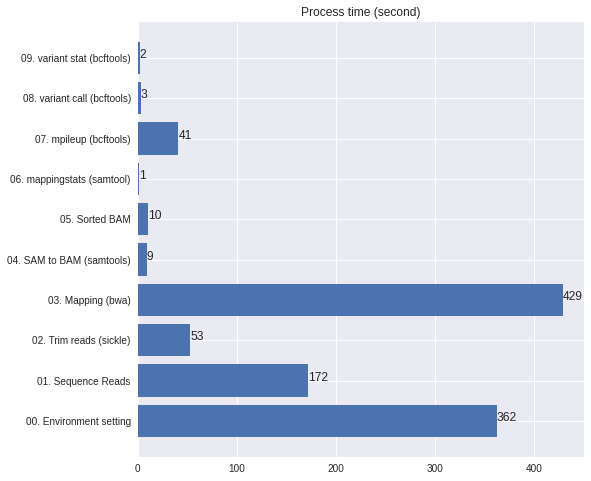

<Figure size 576x576 with 0 Axes>

In [123]:
# Bar grah
plt.rcParams["figure.figsize"] = (8,8)

def get_bar_chart(df):
  x = df['steps']
  y = df['duration(second)']

  plt.barh(x, y)
  plt.title(f"Process time (second)")

  for index, value in enumerate(y):
      plt.text(value, index, str(value),  fontsize=12)
  
  plt.show()
  plt.savefig('figure1.png')


get_bar_chart(df)

steps,00. Environment setting,01. Sequence Reads,02. Trim reads (sickle),03. Mapping (bwa),04. SAM to BAM (samtools),05. Sorted BAM,06. mappingstats (samtool),07. mpileup (bcftools),08. variant call (bcftools),09. variant stat (bcftools)
duration(second),362,172,53,429,9,10,1,41,3,2


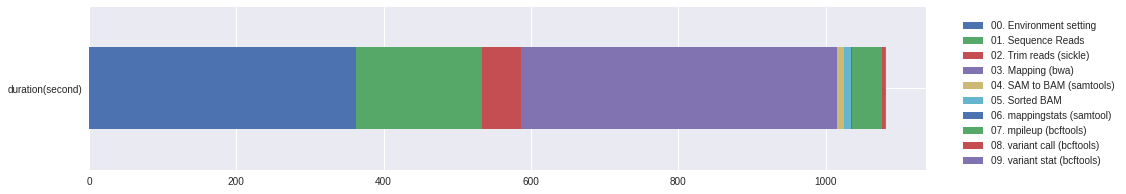

In [121]:
plt.rcParams["figure.figsize"] = (15,3)

def get_staced_chart(df):
  df = df[["steps", "duration(second)"]].T
  df.columns = df.iloc[0]
  df = df.drop(df.index[0])

  df.plot.barh(stacked=True)
  plt.legend(loc=(1.04, 0))

  return df

get_staced_chart(df)

Ref: 
- tutorial: https://www.youtube.com/watch?v=mKqdfdtv0cI
- tutorial: https://www.youtube.com/watch?v=7W7hrWNyCaM&list=PLe1-kjuYBZ07xrDcac1L92iMl5Pa_xGcD
- data sequence: http://ftp.sra.ebi.ac.uk
- 1000 genome project ftp site:
  - http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/
- data reference: 
  - Agy99.fasta from ncbi
  - Mycobacterium ulcerans Agy99, complete genome from ncbi
  - https://www.ncbi.nlm.nih.gov/nuccore/CP000325.1
- data vcf: https://github.com/vappiah/vcf-file-manipulation/tree/main/data